In [1]:
import pandas
import os

from collections import defaultdict
import matplotlib.pyplot as plt

# Isolated Sign Language Recognition

In [3]:
df = pandas.read_excel('../Isolated_Sign_Language_Recognition.xlsx', index_col=0)

In [3]:
df.head(20)

,Gloss,Split,Video_ID
0,feeder,train,1
1,feeder,train,2
2,feeder,train,3
3,feeder,dev,4
4,feeder,test,5
5,forth,train,6
6,forth,dev,7
7,forth,test,8
8,plaster,train,9
9,plaster,train,10


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3209 entries, 0 to 3208
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Gloss     3209 non-null   object
 1   Split     3209 non-null   object
 2   Video_ID  3209 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 100.3+ KB


In [8]:
len(df['Gloss'].value_counts())

610

In [9]:
df['Split'].value_counts()

Split
train    1989
dev       610
test      610
Name: count, dtype: int64

In [4]:
gloss = df.value_counts('Gloss')
d = gloss.to_dict()

In [7]:
d1 = dict()
for k,v in d.items():
    if v not in d1:
        d1[v] = 1
    else:
        d1[v] = d1[v] + 1

d1

{114: 1,
 41: 1,
 28: 1,
 26: 1,
 20: 1,
 18: 1,
 17: 2,
 16: 2,
 15: 1,
 14: 2,
 13: 5,
 12: 3,
 11: 5,
 10: 9,
 9: 24,
 8: 29,
 7: 38,
 6: 60,
 5: 73,
 4: 115,
 3: 236}

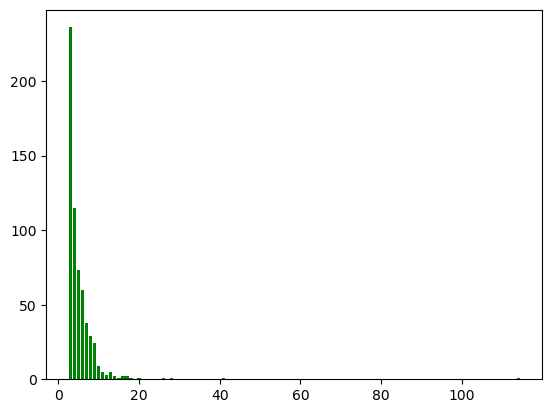

In [13]:
plt.bar(list(d1.keys()), d1.values(), color='g')
plt.show()

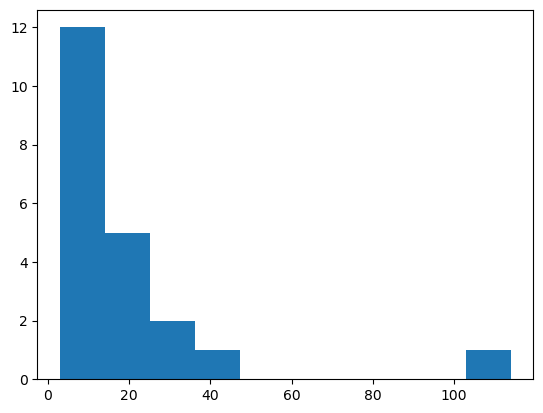

In [9]:
plt.hist(d1)
plt.show()

In [10]:
potential_words = []
for k,v in gloss.items():
    if v >= 10:
        potential_words.append(k)

potential_words

['sally',
 'egg',
 'use',
 'do',
 'jay',
 'tools',
 'tool',
 'pattern',
 'wool',
 'map',
 'wood',
 'ice',
 'excite',
 's',
 'pie',
 'recycle',
 'possum',
 'moon',
 'min',
 'curly',
 'cream',
 'veg',
 'glue',
 'shed',
 'code',
 'dr',
 'dirty',
 'push',
 'seed',
 'goal',
 'weed',
 'liquid',
 'jigsaw',
 'footprint',
 'reuse']

In [13]:
potential_df = df[df['Gloss'].isin(potential_words)]

In [14]:
potential_df

,Gloss,Split,Video_ID
15,recycle,train,16
16,recycle,train,17
17,recycle,train,18
18,recycle,train,19
19,recycle,train,20
...,...,...,...
2898,possum,train,2899
2899,possum,train,2900
2900,possum,train,2901
2901,possum,dev,2902


# Fingerspelling Detection

In [3]:
f_df = pandas.read_excel('Fingerspelling_Detection.xlsx', index_col=0)
f_df.head(20)

,Video_Clip_Name,Begin_Frame,End_Frame,Finger_Spelling,split
0,video_80_130_signer.mp4,56,65.0,E G G,train
1,13_11_2022_94_signer.mp4,242,270.0,H A C K E R S,train
2,video_47_89_signer.mp4,3,22.0,R O P E,train
3,video_81_33_signer.mp4,32,60.0,S H E D,dev
4,video_10_78_signer.mp4,29,72.0,T R A C Y,train
5,video_86_72_signer.mp4,130,156.0,I C E,train
6,video_81_3_signer.mp4,28,56.0,S A L L Y,train
7,video_70_190_signer.mp4,65,84.0,W A S H E R,train
8,16_10_2022_138_signer.mp4,345,358.0,L A W,test
9,13_11_2022_3_signer.mp4,117,133.0,S E S,train


In [4]:
f_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2004 entries, 0 to 2003
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Video_Clip_Name  2004 non-null   object 
 1   Begin_Frame      2004 non-null   int64  
 2   End_Frame        2003 non-null   float64
 3   Finger_Spelling  2004 non-null   object 
 4   split            2004 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 93.9+ KB


In [5]:
f_df[f_df['Video_Clip_Name'] == "4_12_2022_59_signer.mp4"]

,Video_Clip_Name,Begin_Frame,End_Frame,Finger_Spelling,split
242,4_12_2022_59_signer.mp4,220,233.0,C O A L,train
426,4_12_2022_59_signer.mp4,86,96.0,G G,train
626,4_12_2022_59_signer.mp4,497,522.0,C O M P O,train
1362,4_12_2022_59_signer.mp4,244,251.0,A S,train
1534,4_12_2022_59_signer.mp4,439,454.0,C O A L,train
1541,4_12_2022_59_signer.mp4,577,586.0,G G,train
1601,4_12_2022_59_signer.mp4,272,304.0,C O M P O,train
1809,4_12_2022_59_signer.mp4,349,371.0,N S W,train
1883,4_12_2022_59_signer.mp4,379,389.0,Q Q,test


In [6]:
f_df['Video_Clip_Name'].value_counts()

Video_Clip_Name
4_12_2022_59_signer.mp4      9
13_11_2022_24_signer.mp4     7
13_11_2022_68_signer.mp4     6
4_12_2022_8_signer.mp4       5
13_11_2022_150_signer.mp4    5
                            ..
video_59_99_signer.mp4       1
video_67_101_signer.mp4      1
video_86_162_signer.mp4      1
video_55_110_signer.mp4      1
video_15_60_signer.mp4       1
Name: count, Length: 1605, dtype: int64

In [7]:
f_gloss = f_df.value_counts('Finger_Spelling')
f_gloss.to_dict()

{'S A L L Y': 114,
 'E G G': 43,
 'U S E': 28,
 'D O': 27,
 'G G': 25,
 'I F': 25,
 'J A Y': 20,
 'D R': 19,
 'N S W': 19,
 'T O O L S': 18,
 'P A T T E R N': 17,
 'T O O L': 17,
 'R E P': 16,
 'M A P': 16,
 'W O O D': 16,
 'W O O L': 16,
 'O I L': 15,
 'M I N': 14,
 'I C E': 14,
 'M O O N': 13,
 'P O S S U M': 13,
 'P I E': 13,
 'R E C Y C L E': 13,
 'S': 13,
 'C R E A M': 12,
 'T R U M P': 12,
 'B I D E N': 11,
 'C O D E': 11,
 'S H E D': 11,
 'T A S': 11,
 'V E G': 11,
 'G L U E': 11,
 'P U S H': 10,
 'R E U S E': 10,
 'C U P': 10,
 'S E E D': 10,
 'W E E D': 10,
 'C O A L': 10,
 'C O R A L': 9,
 'M E S S I': 9,
 'F L O U R': 9,
 'G A S': 9,
 'N T': 9,
 'S E C': 9,
 'S E N A T E': 9,
 'D E M': 8,
 'O D D': 8,
 'C A M P': 8,
 'P O X': 8,
 'C O M P O S T': 8,
 'P A N C A K E': 8,
 'A B C': 8,
 'T O': 7,
 'C L U E': 7,
 'P O T': 7,
 'G A L L E Y': 7,
 'S E E D S': 7,
 'T R E A S U R E': 7,
 'V I C': 7,
 'R O P E': 7,
 'A R T': 7,
 'P M': 7,
 'M U D': 7,
 'S E S': 6,
 'A S': 6,
 'D V': 

In [8]:
f_abc = defaultdict(int)

In [9]:
for word, appear in f_gloss.items():
    chars = word.split(' ')
    # print(chars)
    for c in chars:
        f_abc[c] += appear

f_abc.pop('')

84

In [10]:
f_abc = dict(sorted(f_abc.items()))
f_abc

{'A': 868,
 'B': 150,
 'C': 416,
 'D': 313,
 'E': 955,
 'F': 141,
 'G': 320,
 'H': 162,
 'I': 457,
 'J': 45,
 'K': 105,
 'L': 676,
 'M': 328,
 'N': 433,
 'O': 669,
 'P': 330,
 'Q': 28,
 'R': 553,
 'S': 768,
 'T': 481,
 'U': 285,
 'V': 79,
 'W': 157,
 'X': 33,
 'Y': 239,
 'Z': 16}

In [11]:
total_samples = 0
for _,v in f_abc.items():
    total_samples += v

print(total_samples)

9007


## Delete videos not used in the DataFrame

In [13]:
# Directory path
directory_path = '/Users/hanhf/Works/programming/uow-studies/csit998/csit998_ml/data/fingerspelling_detection/raw_data'

# List of files in the DataFrame
files_in_df = set(f_df['Video_Clip_Name'])

# List of files in the directory
files_in_directory = set(os.listdir(directory_path))

# Files to delete (present in the directory but not in the DataFrame)
files_to_delete = files_in_directory - files_in_df

# Delete files
for file_name in files_to_delete:
    file_path = os.path.join(directory_path, file_name)
    if os.path.isfile(file_path):
        os.remove(file_path)
        print(f'Deleted {file_path}')
    else:
        print(f'{file_path} is not a file or does not exist')